# Altairで「マンガ雑誌のデータ」の図を作り直す

今回は、文化庁の[メディア芸術データベース・ラボ（MADB Lab）](https://mediag.bunka.go.jp/madb_lab/)で公開されている四大少年誌（週刊少年サンデー、週刊少年ジャンプ、週刊少年チャンピオン、週刊少年マガジン）のデータを使って、量的データと質的データの可視化を練習します。

まず、「四大少年誌それぞれの掲載作品のジャンルと著者にはどのような特徴があるのか？」という大きな問いを立て、可視化手法を学びながらデータを見て、具体的な問いを決めていきましょう。

[マンガと学ぶデータビジュアライゼーション](https://kakeami.github.io/viz-madb/index.html)の内容を全面的に参考にし、一部改変しています。

[Plotlyで作られた図](./visualizing-quantitative-and-qualitative-data.ipynb)の中から、好きな図を3つ選んで、Altairで再現しましょう。

再現する時には、変数の性質（名義、順序、間隔、比例）に注意して、どのタイプの図がどの変数をうまく扱えるかを考えてみましょう。

複雑な図を再現したい時は、[Altair Example Gallery](https://altair-viz.github.io/gallery/index.html)を参考にしてみてください。

## ライブラリの読み込み

In [1]:
# ライブラリのインストール。必要に応じてコメントアウトする。
%pip install altair
%pip install pandas
%pip install itertools

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

import altair as alt

In [3]:
import itertools
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 5000行の制限をはずす
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

# Material Design 3 図表スタイルガイド

## 図の構成要素

### 全体のサイズ
- デスクトップ表示: 最大幅 1200px、最小幅 600px
- モバイル表示: ビューポート幅の92%
- アスペクト比: 16:9 または 4:3 を推奨
- パディング: 周囲に24dp以上の余白を確保

### 図番号
- 位置: 左上隅
- フォント: Roboto Mono
- サイズ: 12sp
- カラー: MD3 Neutral Variant 70
- フォーマット: "Fig. 1.2" のような形式

### タイトル
- 位置: 図番号の下
- フォント: Product Sans
- サイズ: 24sp
- カラー: MD3 Primary 40
- 行間: 32sp
- 最大2行まで

### サブタイトル
- 位置: タイトルの下
- フォント: Roboto
- サイズ: 16sp
- カラー: MD3 Neutral 60
- 行間: 24sp

### 軸タイトル
- フォント: Roboto Medium
- サイズ: 14sp
- カラー: MD3 Neutral 30
- 余白: 軸から16dp

### 軸ラベル
- フォント: Roboto
- サイズ: 12sp
- カラー: MD3 Neutral 50
- 間隔: 最小8dp

### 軸と目盛り
- 太さ: 1dp
- カラー: MD3 Neutral 30
- 目盛りの長さ: 4dp
- 目盛り間隔: データに応じて自動調整

### グリッド線
- スタイル: 点線 (2dp 間隔)
- 太さ: 0.5dp
- カラー: MD3 Neutral 20
- 透明度: 40%

### データソース・注記
- 位置: 図の下部
- フォント: Roboto
- サイズ: 11sp
- カラー: MD3 Neutral 60
- 行間: 16sp

### ロゴ
- 位置: 右下隅
- サイズ: 高さ24dp
- 余白: 周囲に12dp

### 凡例
- 位置: 図の右側または下部
- フォント: Roboto
- サイズ: 12sp
- カラー: MD3 Neutral 30
- アイコンサイズ: 16x16dp
- 行間: 20sp

### ラベル
- フォント: Roboto
- サイズ: 12sp
- カラー: MD3 Primary 40
- 背景: MD3 Surface Container Low
- パディング: 4dp
- 角丸: 4dp

## 色
### プライマリーカラー
- メインチャート: MD3 Primary 40
- アクセント: MD3 Secondary 40
- 警告/エラー: MD3 Error 40
- 成功: MD3 Tertiary 40

### カラーパレット
- シーケンシャルデータ: Material Design 3 トーン スケール
- カテゴリカルデータ: Material Design 3 調和カラーシステム
- 透明度: 必要に応じて40-100%

## 書体
### フォントファミリー
- 見出し: Product Sans
- 本文: Roboto
- モノスペース: Roboto Mono

### フォントウェイト
- 見出し: Medium (500)
- 本文: Regular (400)
- 強調: Bold (700)

## 保存形式
### ウェブ用
- フォーマット: SVG
- 解像度: @2x
- 最適化: SVGO

### 印刷用
- フォーマット: PDF
- 解像度: 300dpi
- カラープロファイル: CMYK

### エクスポート用
- PNG: @3x
- JPEG: 品質85%以上

## アクセシビリティ
### コントラスト
- テキスト: WCAG AAA基準 (7:1)
- グラフ要素: WCAG AA基準 (4.5:1)

### インタラクション
- ホバー状態の表示
- フォーカス可能な要素
- キーボードナビゲーション

### スクリーンリーダー対応
- 代替テキストの提供
- データテーブルの提供
- ARIA属性の適切な使用

### カラーユニバーサルデザイン
- ColorAdd システムの採用
- パターンの併用
- 形状による区別の追加

## 準備関数

In [6]:
# weekdayを曜日に変換
WD2STR = {
    0: 'Mon.',
    1: 'Tue.',
    2: 'Wed.',
    3: 'Thu.',
    4: 'Fri.',
    5: 'Sat.',
    6: 'Sun.',}

In [7]:
def add_years_to_df(df, unit_years=10):
    """unit_years単位で区切ったyears列を追加"""
    df_new = df.copy()
    df_new['years'] = \
        pd.to_datetime(df['datePublished']).dt.year \
        // unit_years * unit_years
    df_new['years'] = df_new['years'].astype(str)
    return df_new

In [8]:
def add_weekday_to_df(df):
    """曜日情報をdfに追加"""
    df_new = df.copy()
    df_new['weekday'] = \
        pd.to_datetime(df_new['datePublished']).dt.weekday
    df_new['weekday_str'] = df_new['weekday'].apply(
        lambda x: WD2STR[x])
    return df_new

In [9]:
def add_mcid_to_df(df):
    """mcnameのindexをdfに追加"""
    df_new = df.copy()
    mcname2mcid = {
        x: i for i, x in enumerate(df['mcname'].unique())}
    df_new['mcid'] = df_new['mcname'].apply(
        lambda x: mcname2mcid[x])
    return df_new

In [10]:
def resample_df_by_cname_and_years(df):
    """cnameとyearsのすべての組み合わせが存在するように0埋め
    この処理を実施しないと作図時にX軸方向の順序が変わってしまう"""
    df_new = df.copy()
    yearss = df['years'].unique()
    cnames = df['cname'].unique()
    for cname, years in itertools.product(cnames, yearss):
        df_tmp = df_new[
            (df_new['cname'] == cname)&\
            (df_new['years'] == years)]
        if df_tmp.shape[0] == 0:
            s = pd.DataFrame(
                {'cname': cname,
                 'years': years,
                 'weeks': 0,},
                index=df_tmp.columns)
            df_new = pd.concat(
                [df_new, s], ignore_index=True)
    return df_new

In [11]:
def resample_df_by_creator_and_years(df):
    """creatorとyearsのすべての組み合わせが存在するように0埋め
    この処理を実施しないと作図時にX軸方向の順序が変わってしまう"""
    df_new = df.copy()
    yearss = df['years'].unique()
    creators = df['creator'].unique()
    for creator, years in itertools.product(creators, yearss):
        df_tmp = df_new[
            (df_new['creator'] == creator)&\
            (df_new['years'] == years)]
        if df_tmp.shape[0] == 0:
            s = pd.Series(
                {'creator': creator,
                 'years': years,
                 'weeks': 0,},
                index=df_tmp.columns)
            df_new = pd.concat(
                [df_new, s], ignore_index=True)
    return df_new

## データの用意

四大少年誌の`1970-07-27`から`2017-07-06`までの全ての掲載作品のデータを使います。

すでに前処理がされているデータがあるので、そちらを使います。

In [12]:
file = "./data/episodes.csv"

In [13]:
df = pd.read_csv(file)

In [14]:
df.shape

(179931, 17)

各週の掲載作品を一行ずつ格納しているため、合計で約18万行程度になります。

In [15]:
df.columns

Index(['mcname', 'miid', 'miname', 'cid', 'cname', 'epname', 'creator',
       'pageStart', 'pageEnd', 'numberOfPages', 'datePublished', 'price',
       'publisher', 'editor', 'pages', 'pageEndMax', 'pageStartPosition'],
      dtype='object')

- `mcname`: 雑誌名（**M**gazine **C**ollection **NAME**）
- `miid`：雑誌巻号ID（**M**agazine **I**tem **ID**）
- `miname`: 雑誌巻号名（**M**agazine **I**tem **NAME**）
- `cid`: マンガ作品ID（**C**omic **ID**）
- `cname`: マンガ作品名（**C**omic **NAME**）
- `epname`: 各話タイトル（**EP**isode **NAME**）
- `creator`: 作者名
- `pageStart`: 開始ページ
- `pageEnd`: 終了ページ
- `numberOfPages`: 雑誌の合計ページ数
- `datePublished`: 雑誌の発行日
- `price`: 雑誌の価格
- `publisher`: 雑誌の出版社
- `editor`: 雑誌の編集者（編集長）
- `pages`: 各話のページ数（`pageEnd` - `pageStart` + 1）
- `pageEndMax`: 雑誌に掲載されているマンガ作品のうち，`pageEnd`の最大値
- `pageStartPosition`: 各話の`pageStart`の相対的な位置（`pageStart` / `pageEndMax`）

In [16]:
df.head()

,mcname,miid,miname,cid,cname,epname,creator,pageStart,pageEnd,numberOfPages,datePublished,price,publisher,editor,pages,pageEndMax,pageStartPosition
0,週刊少年ジャンプ,M616363,週刊少年ジャンプ 1970年 表示号数31,C88180,男一匹ガキ大将,土佐の源蔵の巻,本宮ひろ志,7.0,37.0,280.0,1970-07-27,80.0,集英社,長野規,31.0,275.0,0.025455
1,週刊少年チャンピオン,M558279,週刊少年チャンピオン 1970年 表示号数14,C94272,朝日の恋人,NaN,かざま鋭二,15.0,43.0,292.0,1970-07-27,80.0,秋田書店 ∥ アキタショテン,成田清美,29.0,290.0,0.051724
2,週刊少年ジャンプ,M616363,週刊少年ジャンプ 1970年 表示号数31,C87448,ど根性ガエル,男はつらいよの巻,吉沢やすみ,39.0,53.0,280.0,1970-07-27,80.0,集英社,長野規,15.0,275.0,0.141818
3,週刊少年チャンピオン,M558279,週刊少年チャンピオン 1970年 表示号数14,C94289,あばしり一家,アバシリ吉三の美人地獄編,永井豪,48.0,66.0,292.0,1970-07-27,80.0,秋田書店 ∥ アキタショテン,成田清美,19.0,290.0,0.165517
4,週刊少年ジャンプ,M616363,週刊少年ジャンプ 1970年 表示号数31,C88021,あらし!三匹,ミヒル登場の巻,池沢さとし,56.0,70.0,280.0,1970-07-27,80.0,集英社,長野規,15.0,275.0,0.203636


In [17]:
df.describe()

,pageStart,pageEnd,numberOfPages,price,pages,pageEndMax,pageStartPosition
count,179931.000000,179931.000000,179624.000000,179893.000000,179931.000000,179931.000000,179931.000000
mean,210.845105,228.371240,417.376325,203.871740,18.526135,408.249379,0.514837
std,123.860878,122.038708,67.418723,41.955489,7.712730,69.804101,0.283146
min,1.000000,1.000000,36.000000,80.000000,1.000000,200.000000,0.002045
25%,107.000000,126.000000,356.000000,180.000000,17.000000,346.000000,0.274840
50%,205.000000,222.000000,437.000000,210.000000,19.000000,433.000000,0.520588
75%,305.000000,322.000000,464.000000,236.000000,20.000000,457.000000,0.759626
max,581.000000,600.000000,600.000000,371.000000,487.000000,600.000000,1.000000


欠損値を確認してみます。

特に`epname`と`publisher`の欠測が多いことがわかります．

In [28]:
df.isna().sum().reset_index()

,index,0
0,mcname,0
1,miid,0
2,miname,0
3,cid,9
4,cname,9
5,epname,26807
6,creator,441
7,pageStart,0
8,pageEnd,0
9,numberOfPages,307


---

## Altairで再現1：雑誌別エントリー数の経年推移

Available fonts that contain '黑' or 'ming':


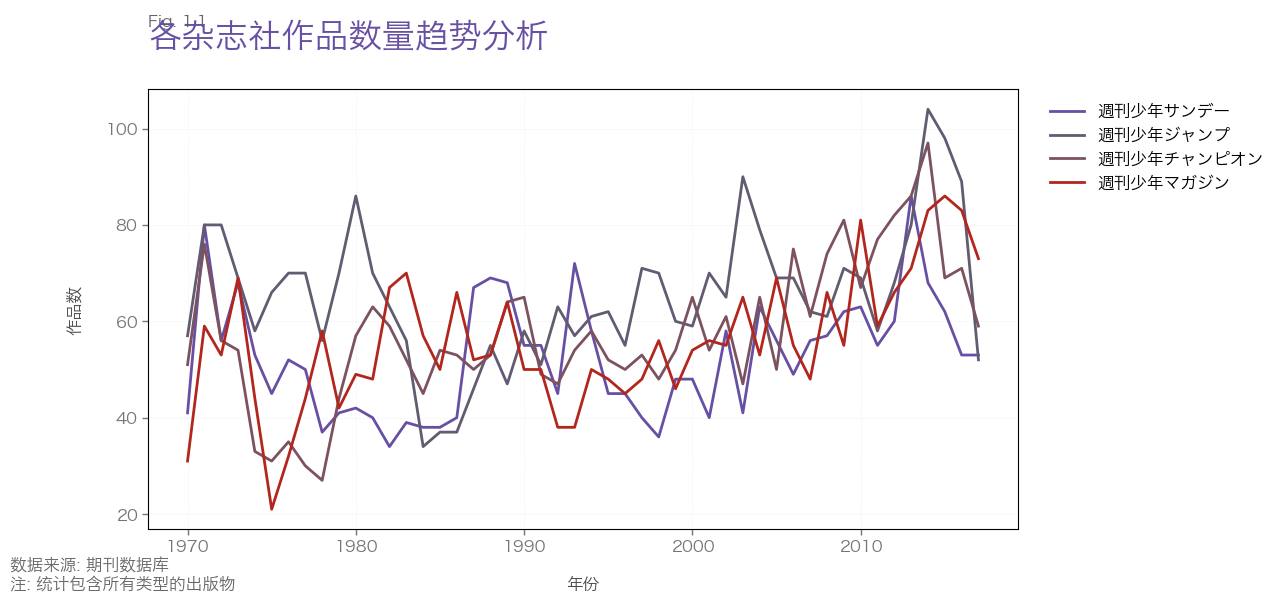

<Figure size 640x480 with 0 Axes>

In [42]:
# 首先导入所需的库
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import platform
import matplotlib as mpl

# 重要：在创建任何图形之前设置backend
%matplotlib inline
mpl.style.use('default')

# 检查可用的字体
import matplotlib.font_manager as fm
# 打印系统中可用的字体，这将帮助我们找到可用的中文字体
available_fonts = [f.name for f in fm.fontManager.ttflist]
print("Available fonts that contain '黑' or 'ming':")
chinese_fonts = [f for f in available_fonts if '黑' in f or 'ming' in f]
for font in chinese_fonts:
    print(f"- {font}")

# 选择一个可用的中文字体
# 这里我们使用一个函数来获取第一个可用的中文字体
def get_available_chinese_font():
    # 常见的中文字体列表
    chinese_font_list = [
        'PingFang SC',
        'Hiragino Sans GB',
        'Microsoft YaHei',
        'STHeiti',
        'SimHei',
        'Arial Unicode MS'
    ]
    # 检查哪些字体可用
    for font in chinese_font_list:
        if font in available_fonts:
            return font
    return 'Arial'  # 如果没有找到中文字体，返回Arial作为后备

# 获取可用的中文字体
chinese_font = get_available_chinese_font()

# 设置全局字体
plt.rcParams['font.family'] = chinese_font
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建图表数据
df_plot = df.copy()
df_plot['year'] = pd.to_datetime(df_plot['datePublished']).dt.year
df_trend = df_plot.groupby(['mcname', 'year']).cname.nunique().reset_index()

# 设置Material Design 3颜色
MD3_COLORS = {
    'primary_40': '#6750A4',
    'secondary_40': '#625B71',
    'tertiary_40': '#7D5260',
    'error_40': '#B3261E',
    'neutral_30': '#494949',
    'neutral_50': '#757575',
    'neutral_60': '#666666',
    'neutral_20': '#E0E0E0',
    'surface_container': '#F5F5F5'
}

# 创建图表
fig = plt.figure(figsize=(12, 6.75))  # 16:9比例
gs = GridSpec(2, 1, height_ratios=[1, 8], hspace=0.1)

# 创建字体属性对象，使用我们找到的中文字体
title_font = FontProperties(family=chinese_font, size=24, weight='bold')
body_font = FontProperties(family=chinese_font, size=12)

# 添加图表标题区域
ax_title = fig.add_subplot(gs[0])
ax_title.axis('off')
ax_title.text(0, 0.7, 'Fig. 1.1', 
              fontsize=12, 
              color=MD3_COLORS['neutral_60'])
ax_title.text(0, 0.3, '各杂志社作品数量趋势分析',
              fontproperties=title_font,
              color=MD3_COLORS['primary_40'])

# 创建主图表区域
ax = fig.add_subplot(gs[1])

# 绘制数据线
unique_magazines = df_trend['mcname'].unique()
colors = [MD3_COLORS['primary_40'], MD3_COLORS['secondary_40'], 
          MD3_COLORS['tertiary_40'], MD3_COLORS['error_40']]

for idx, magazine in enumerate(unique_magazines):
    data = df_trend[df_trend['mcname'] == magazine]
    ax.plot(data['year'], data['cname'], 
            label=magazine,
            color=colors[idx % len(colors)],
            linewidth=2)

# 设置坐标轴样式
ax.set_xlabel('年份', fontproperties=body_font, color=MD3_COLORS['neutral_30'], labelpad=16)
ax.set_ylabel('作品数', fontproperties=body_font, color=MD3_COLORS['neutral_30'], labelpad=16)

# 设置刻度样式
ax.tick_params(axis='both', colors=MD3_COLORS['neutral_50'], length=4, width=1, labelsize=12)

# 添加网格线
ax.grid(True, linestyle='--', linewidth=0.5, color=MD3_COLORS['neutral_20'], alpha=0.4)

# 设置图例
legend = ax.legend(bbox_to_anchor=(1.02, 1),
                  loc='upper left',
                  prop=body_font,
                  frameon=False)

# 添加数据来源注释
plt.figtext(0.01, 0.02,
            '数据来源: 期刊数据库\n注: 统计包含所有类型的出版物',
            fontproperties=body_font,
            color=MD3_COLORS['neutral_60'])

# 设置边距
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # 为图例留出空间

# 显示图表
plt.show()

# 保存图表（如果需要）
plt.savefig('publication_trends.svg', dpi=300, bbox_inches='tight', pad_inches=0.24)
plt.savefig('publication_trends.pdf', dpi=300, bbox_inches='tight', pad_inches=0.24)

## Altairで再現2：TOP20著者の作品のページ配分

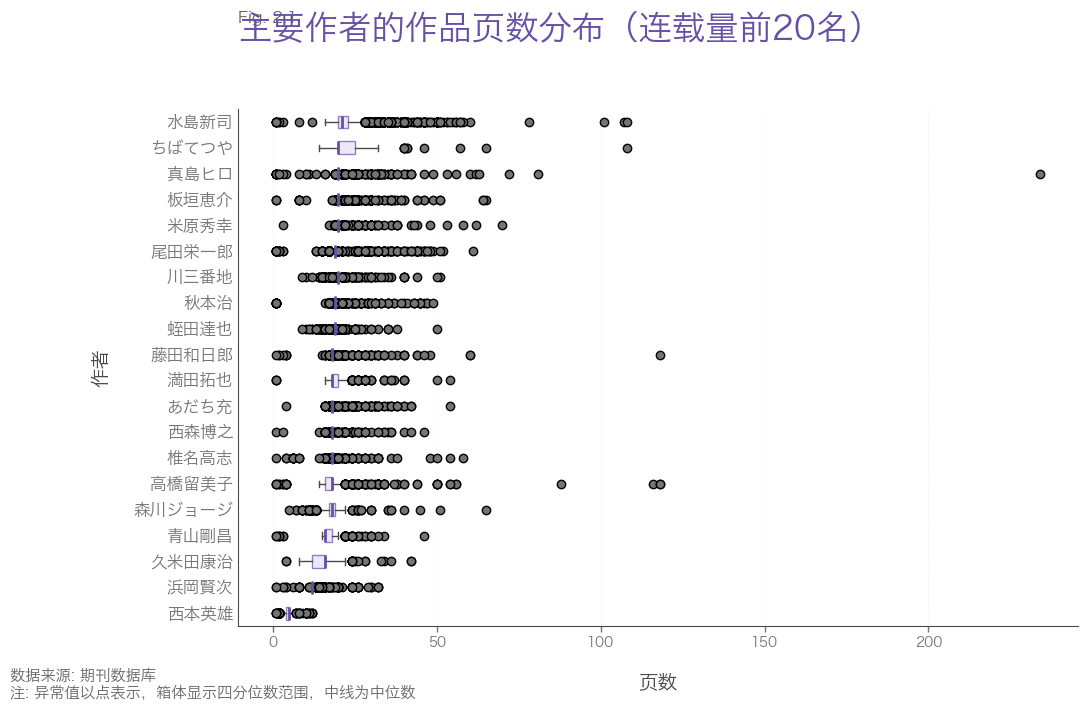

In [43]:
# 准备数据
df_pages = df.copy()
top_20_creators = df['creator'].value_counts().head(20).index
df_pages = df_pages[df_pages['creator'].isin(top_20_creators)]

# 计算每个作者的平均页数用于排序
creator_means = df_pages.groupby('creator')['pages'].mean().sort_values(ascending=True)
ordered_creators = creator_means.index

# 设置Material Design 3颜色
MD3_COLORS = {
    'primary_40': '#6750A4',
    'secondary_40': '#625B71',
    'tertiary_40': '#7D5260',
    'error_40': '#B3261E',
    'neutral_30': '#494949',
    'neutral_50': '#757575',
    'neutral_60': '#666666',
    'neutral_20': '#E0E0E0',
    'surface_container': '#F5F5F5',
    'box_fill': '#E8DEF8',  # 使用主色调的浅色版本
    'box_edge': '#6750A4'   # 使用主色调
}

# 创建图表
plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1, height_ratios=[1, 12], hspace=0.2)

# 添加标题区域
ax_title = plt.subplot(gs[0])
ax_title.axis('off')
ax_title.text(0, 0.7, 'Fig. 2.1', 
              fontsize=12, 
              color=MD3_COLORS['neutral_60'])
ax_title.text(0, 0.3, '主要作者的作品页数分布（连载量前20名）',
              fontsize=24,
              color=MD3_COLORS['primary_40'])

# 创建箱线图
ax = plt.subplot(gs[1])

# 使用violin plot来展示分布
bp = ax.boxplot([df_pages[df_pages['creator'] == creator]['pages'] for creator in ordered_creators],
                vert=False,  # 水平方向的箱线图
                patch_artist=True,  # 填充箱体
                medianprops={'color': MD3_COLORS['primary_40'], 'linewidth': 2},
                flierprops={'marker': 'o', 
                           'markerfacecolor': MD3_COLORS['neutral_50'],
                           'markersize': 6},
                boxprops={'facecolor': MD3_COLORS['box_fill'],
                         'color': MD3_COLORS['box_edge'],
                         'alpha': 0.7},
                whiskerprops={'color': MD3_COLORS['neutral_30']},
                capprops={'color': MD3_COLORS['neutral_30']})

# 设置y轴标签（作者名）
ax.set_yticklabels(ordered_creators, fontsize=12)

# 设置坐标轴样式
ax.set_xlabel('页数', fontsize=14, color=MD3_COLORS['neutral_30'], labelpad=16)
ax.set_ylabel('作者', fontsize=14, color=MD3_COLORS['neutral_30'], labelpad=16)

# 设置网格线
ax.grid(True, axis='x', linestyle='--', linewidth=0.5, 
        color=MD3_COLORS['neutral_20'], alpha=0.4)
ax.set_axisbelow(True)  # 网格线放在图形下方

# 设置刻度样式
ax.tick_params(axis='both', colors=MD3_COLORS['neutral_50'], length=4, width=1)
ax.tick_params(axis='y', length=0)  # 移除y轴刻度线

# 移除上方和右侧的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(MD3_COLORS['neutral_30'])
ax.spines['bottom'].set_color(MD3_COLORS['neutral_30'])

# 添加数据来源注释
plt.figtext(0.01, 0.02,
            '数据来源: 期刊数据库\n注: 异常值以点表示，箱体显示四分位数范围，中线为中位数',
            fontsize=11,
            color=MD3_COLORS['neutral_60'])

# 调整布局
plt.tight_layout()
plt.subplots_adjust(left=0.2)  # 为作者名留出足够空间

# 保存图表
plt.savefig('author_pages_distribution.svg', 
            dpi=300, 
            bbox_inches='tight',
            pad_inches=0.24)

# 显示图表
plt.show()

## Altairで再現3：各雑誌の発行部数価格の推移

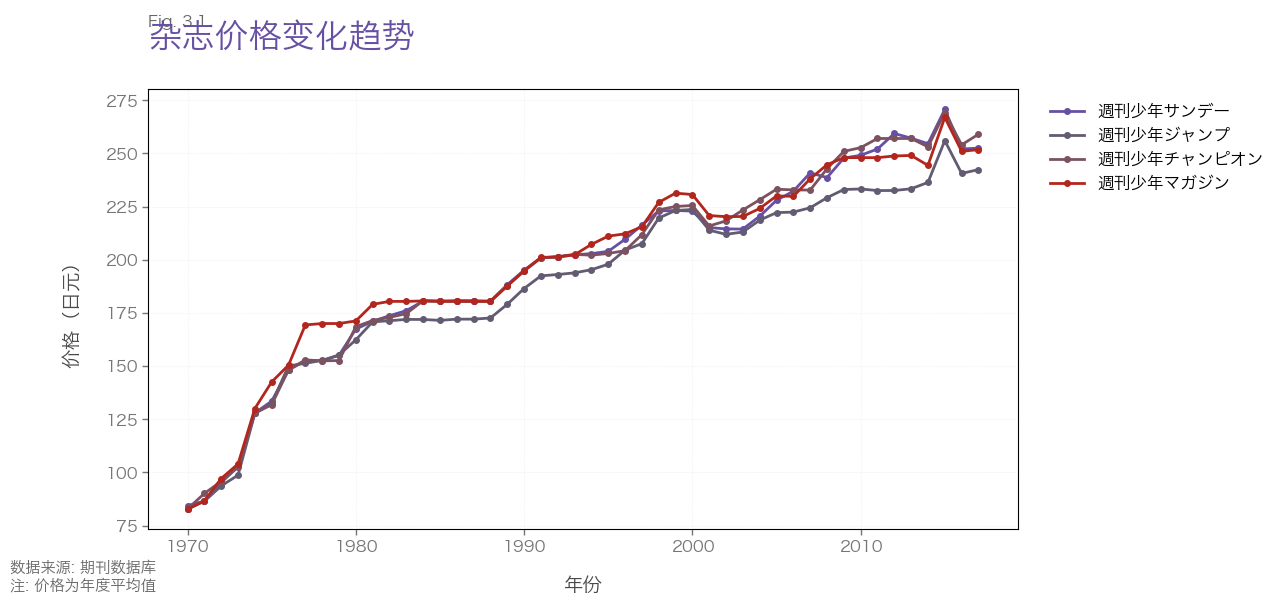

In [44]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd

# 数据准备
df_price = df.copy()
df_price['year'] = pd.to_datetime(df_price['datePublished']).dt.year
df_price = df_price.groupby(['mcname', 'year'])['price'].mean().reset_index()

# Material Design 3 颜色
MD3_COLORS = {
    'primary_40': '#6750A4',
    'secondary_40': '#625B71',
    'tertiary_40': '#7D5260',
    'error_40': '#B3261E',
    'neutral_30': '#494949',
    'neutral_50': '#757575',
    'neutral_60': '#666666',
    'neutral_20': '#E0E0E0'
}

# 创建图表
fig = plt.figure(figsize=(12, 6.75))
gs = GridSpec(2, 1, height_ratios=[1, 8], hspace=0.1)

# 标题区域
ax_title = fig.add_subplot(gs[0])
ax_title.axis('off')
ax_title.text(0, 0.7, 'Fig. 3.1', fontsize=12, color=MD3_COLORS['neutral_60'])
ax_title.text(0, 0.3, '杂志价格变化趋势', fontsize=24, color=MD3_COLORS['primary_40'])

# 主图表区域
ax = fig.add_subplot(gs[1])

# 绘制数据线
colors = [MD3_COLORS['primary_40'], MD3_COLORS['secondary_40'], 
          MD3_COLORS['tertiary_40'], MD3_COLORS['error_40']]

for idx, magazine in enumerate(df_price['mcname'].unique()):
    data = df_price[df_price['mcname'] == magazine]
    ax.plot(data['year'], data['price'], 
            label=magazine,
            color=colors[idx % len(colors)],
            linewidth=2,
            marker='o',
            markersize=4)

# 设置坐标轴
ax.set_xlabel('年份', fontsize=14, color=MD3_COLORS['neutral_30'], labelpad=16)
ax.set_ylabel('价格（日元）', fontsize=14, color=MD3_COLORS['neutral_30'], labelpad=16)
ax.tick_params(axis='both', colors=MD3_COLORS['neutral_50'], length=4, width=1, labelsize=12)

# 网格线
ax.grid(True, linestyle='--', linewidth=0.5, color=MD3_COLORS['neutral_20'], alpha=0.4)
ax.set_axisbelow(True)

# 图例
legend = ax.legend(bbox_to_anchor=(1.02, 1),
                  loc='upper left',
                  frameon=False,
                  fontsize=12)

# 数据来源注释
plt.figtext(0.01, 0.02,
            '数据来源: 期刊数据库\n注: 价格为年度平均值',
            fontsize=11,
            color=MD3_COLORS['neutral_60'])

# 布局调整
plt.tight_layout()
plt.subplots_adjust(right=0.85)

# 保存和显示
plt.savefig('magazine_price_trends.svg', dpi=300, bbox_inches='tight', pad_inches=0.24)
plt.show()

---

この演習は以上です。